<a href="https://colab.research.google.com/github/Nizar4790k/tradingeconomics/blob/master/TradingEconomicsTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [29]:
import requests
import json
from IPython.html import widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import getpass


Requiring the **API KEY**, if you don't have it please signup at Signup for an account at [developer.tradingeconomics.com](https://developer.tradingeconomics.com)

In [30]:
API_KEY = getpass.getpass('Enter API_KEY:')

Enter API_KEY:··········


In [34]:
def getCountriesName():
  response = requests.get("https://api.tradingeconomics.com/country/?client={API_KEY}".format(API_KEY=API_KEY));
  if response.status_code==200:
    countriesInformation = response.json();
    countriesName = []
    for country in countriesInformation:
      countriesName.append(country["Country"])

    return countriesName;
  else:
    print(response.text)
    return []

In [35]:
countriesName = getCountriesName()

Defining and displaying necesary dropdowns

In [36]:
first_country_dropdown = widgets.Dropdown(options=countriesName)
first_country_widget = widgets.interactive(lambda first_country: print(), first_country=first_country_dropdown)
display(first_country_widget)

second_country_dropdown = widgets.Dropdown(options=countriesName)
second_country_widget = widgets.interactive(lambda second_country: print(), second_country=second_country_dropdown)
display(second_country_widget)

indicators_list = ['Minimum Wages','Military Expenditure','Inflation Rate','Terrorism Index','Temperature']

indicator_dropdown = widgets.Dropdown(options=indicators_list)
second_country_widget = widgets.interactive(lambda selected_indicator:print(), selected_indicator=indicator_dropdown)
display(indicator_dropdown)



interactive(children=(Dropdown(description='first_country', options=('Afghanistan', 'Albania', 'Algeria', 'Ame…

interactive(children=(Dropdown(description='second_country', options=('Afghanistan', 'Albania', 'Algeria', 'Am…

Dropdown(description='selected_indicator', options=('Minimum Wages', 'Military Expenditure', 'Inflation Rate',…

Confirming Selected options

In [37]:
first_selected_country = first_country_dropdown.value
second_selected_country = second_country_dropdown.value
selected_indicator = indicator_dropdown.value

print(first_selected_country)
print(second_selected_country)
print(indicator_dropdown.value)

Mexico
Sweden
Inflation Rate


Defining function for getting historicla data

In [38]:
def get_historical_country_by_indicator(country,indicator,API_KEY):
  response = requests.get("https://api.tradingeconomics.com/historical/country/{country}/indicator/{indicator}?c={api_key}".format(country=country,indicator=selected_indicator,api_key=API_KEY))
 
  if response.status_code==200:
    results_country = response.json()
    x_values = []
    y_values = []
    for result in results_country:
      if result['Frequency']=='Monthly': # Converting to Yearly Frequency
        date = result['DateTime'].split('T')[0].split('-')
        if date[1]=='12' and date[2]=='31': 
          x_values.append(date[0]);
          y_values.append( (result['Value']/100)*12)
      elif result['Frequency']=='Yearly' or result['Frequency']=='None':
        date = result['DateTime'].split('T')[0].split('-')
        if(date[1]=='12' and date[2]=='31'):
          x_values.append(date[0]);
          y_values.append( (result['Value']/100))


    return x_values,y_values
  else:
    print(response.text)
    return[],[];


In [39]:
#Fetching first selected country values
x_first_values,y_first_values = get_historical_country_by_indicator(first_selected_country,selected_indicator,API_KEY)

In [40]:
#Fetching second selected country values
x_second_values,y_second_values = get_historical_country_by_indicator(second_selected_country,selected_indicator,API_KEY)


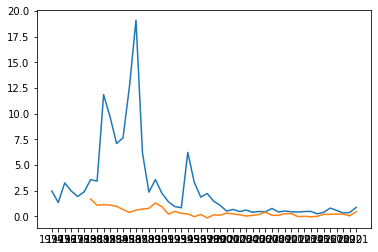

In [41]:
#Showing the Graph
plt.plot(x_first_values,y_first_values,x_second_values,y_second_values)
plt.show()
